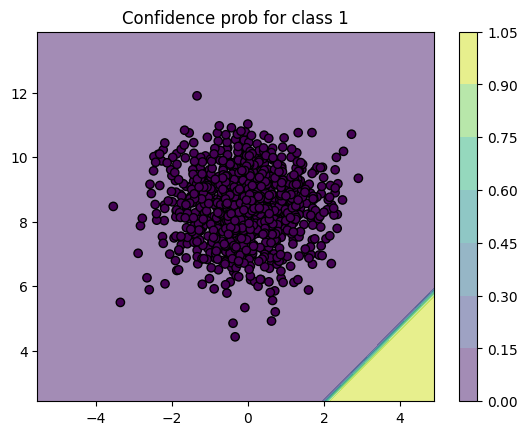

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 2),
        )

    def forward(self, x):
        return self.layers(x)


# Verifying samples generated by iDEM
model = MLP()
model.load_state_dict(torch.load("GMMMLP-weights-isotropic.pth"))
model = model.to(device)
model.eval()
def plot_confidence_prob_dem_samples(model, X, y):
    """Plots confidence score
    """
    cls = 1
    band = 2
    
    x_min, x_max = X[:, 0].min() - band, X[:, 0].max() + band
    y_min, y_max = X[:, 1].min() - band, X[:, 1].max() + band
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    grid = grid.to(device)
    with torch.no_grad():
        logits = model(grid)
        probs = nn.functional.softmax(logits, dim=1)
        Z = probs[:, cls]
        Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z.cpu().numpy(), alpha=0.5)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"Confidence prob for class {cls}")
    plt.show()
    
saved_samples = torch.load('saved_samples/gmm-isotropic-debug-learning/last_samples.pt').cpu().numpy()
plot_confidence_prob_dem_samples(model, saved_samples[-1], np.zeros(saved_samples[-1].shape[0]))